# Final Project: Tuition of Students in Canada

This project is a predictive model project that will be able to predict about how a student had payed or will pay, based on the year, their province, their level of study, their program and their nationality.

Data was taken from Statistics Canada

Canadian Undergards: https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3710000301 

Canadian Grads: https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3710000401

International undergrads: https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3710022401

International grads: https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3710022501

## Imports

In [4]:
#for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for data preprocessing

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#for modeling
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


## Cleaning of collected csv files

### CSV of canadian undergrads 

In [7]:
df1=pd.read_csv('../finals/c_undegrad.csv')

In [8]:
df1.head()

,REF_DATE,GEO,DGUID,Field of study,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2017/2018,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953050,2.2,3046.0,NaN,NaN,NaN,0
1,2018/2019,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953050,2.2,2837.0,NaN,NaN,NaN,0
2,2019/2020,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953050,2.2,2768.0,NaN,NaN,NaN,0
3,2020/2021,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953050,2.2,2781.0,NaN,NaN,NaN,0
4,2021/2022,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953050,2.2,2708.0,NaN,NaN,NaN,0


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672 entries, 0 to 1671
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   REF_DATE        1672 non-null   object 
 1   GEO             1672 non-null   object 
 2   DGUID           1672 non-null   object 
 3   Field of study  1672 non-null   object 
 4   UOM             1672 non-null   object 
 5   UOM_ID          1672 non-null   int64  
 6   SCALAR_FACTOR   1672 non-null   object 
 7   SCALAR_ID       1672 non-null   int64  
 8   VECTOR          1672 non-null   object 
 9   COORDINATE      1672 non-null   float64
 10  VALUE           1310 non-null   float64
 11  STATUS          362 non-null    object 
 12  SYMBOL          0 non-null      float64
 13  TERMINATED      0 non-null      float64
 14  DECIMALS        1672 non-null   int64  
dtypes: float64(4), int64(3), object(8)
memory usage: 196.1+ KB


In [10]:
df1.describe()

,UOM_ID,SCALAR_ID,COORDINATE,VALUE,SYMBOL,TERMINATED,DECIMALS
count,1672.0,1672.0,1672.000000,1310.000000,0.0,0.0,1672.0
mean,370.0,0.0,7.318421,8203.195420,NaN,NaN,0.0
std,0.0,0.0,3.172965,6482.967014,NaN,NaN,0.0
min,370.0,0.0,2.100000,2482.000000,NaN,NaN,0.0
25%,370.0,0.0,4.500000,4640.250000,NaN,NaN,0.0
50%,370.0,0.0,7.190000,6531.500000,NaN,NaN,0.0
75%,370.0,0.0,10.140000,8329.000000,NaN,NaN,0.0
max,370.0,0.0,12.900000,47463.000000,NaN,NaN,0.0


In [11]:
df1.isnull().sum()

REF_DATE             0
GEO                  0
DGUID                0
Field of study       0
UOM                  0
UOM_ID               0
SCALAR_FACTOR        0
SCALAR_ID            0
VECTOR               0
COORDINATE           0
VALUE              362
STATUS            1310
SYMBOL            1672
TERMINATED        1672
DECIMALS             0
dtype: int64

In [12]:
df1['STATUS'].unique()

array([nan, '..'], dtype=object)

In [13]:
#checking where the nan values are in col VALUE
nan_values=df1[df1['VALUE'].isnull()==True]
nan_values

,REF_DATE,GEO,DGUID,Field of study,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
32,2017/2018,Newfoundland and Labrador,2016A000210,Law,Constant dollars,370,units,0,v1411953054,2.6,NaN,..,NaN,NaN,0
33,2018/2019,Newfoundland and Labrador,2016A000210,Law,Constant dollars,370,units,0,v1411953054,2.6,NaN,..,NaN,NaN,0
34,2019/2020,Newfoundland and Labrador,2016A000210,Law,Constant dollars,370,units,0,v1411953054,2.6,NaN,..,NaN,NaN,0
35,2020/2021,Newfoundland and Labrador,2016A000210,Law,Constant dollars,370,units,0,v1411953054,2.6,NaN,..,NaN,NaN,0
36,2021/2022,Newfoundland and Labrador,2016A000210,Law,Constant dollars,370,units,0,v1411953054,2.6,NaN,..,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,2020/2021,Yukon,2016A000260,"Personal, protective and transportation services",Constant dollars,370,units,0,v1411953268,12.2,NaN,..,NaN,NaN,0
1668,2021/2022,Yukon,2016A000260,"Personal, protective and transportation services",Constant dollars,370,units,0,v1411953268,12.2,NaN,..,NaN,NaN,0
1669,2022/2023,Yukon,2016A000260,"Personal, protective and transportation services",Constant dollars,370,units,0,v1411953268,12.2,NaN,..,NaN,NaN,0
1670,2023/2024,Yukon,2016A000260,"Personal, protective and transportation services",Constant dollars,370,units,0,v1411953268,12.2,NaN,..,NaN,NaN,0


#### Data cleaning 

In [15]:
#drop null columns
df1=df1.drop(['STATUS', 'SYMBOL','TERMINATED'], axis=1)
df1.head()

,REF_DATE,GEO,DGUID,Field of study,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS
0,2017/2018,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953050,2.2,3046.0,0
1,2018/2019,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953050,2.2,2837.0,0
2,2019/2020,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953050,2.2,2768.0,0
3,2020/2021,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953050,2.2,2781.0,0
4,2021/2022,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953050,2.2,2708.0,0


In [16]:
#filling null values of columns 'VALUE' with mean of the province and field of study
df1['VALUE'] = df1['VALUE'].fillna(df1.groupby(['GEO', 'Field of study'])['VALUE'].transform("mean"))

In [17]:
df1.isnull().sum()

REF_DATE            0
GEO                 0
DGUID               0
Field of study      0
UOM                 0
UOM_ID              0
SCALAR_FACTOR       0
SCALAR_ID           0
VECTOR              0
COORDINATE          0
VALUE             352
DECIMALS            0
dtype: int64

In [18]:
null=df1[df1['VALUE'].isnull()==True]
null.sample(15)

,REF_DATE,GEO,DGUID,Field of study,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS
1541,2022/2023,Yukon,2016A000260,Humanities,Constant dollars,370,units,0,v1411953252,12.40,NaN,0
1527,2024/2025,Yukon,2016A000260,Education,Constant dollars,370,units,0,v1411953250,12.20,NaN,0
545,2018/2019,New Brunswick,2016A000213,Dentistry,Constant dollars,370,units,0,v1411953121,5.13,NaN,0
1587,2020/2021,Yukon,2016A000260,Engineering,Constant dollars,370,units,0,v1411953258,12.10,NaN,0
1658,2019/2020,Yukon,2016A000260,"Other health, parks, recreation and fitness",Constant dollars,370,units,0,v1411953267,12.19,NaN,0
573,2022/2023,New Brunswick,2016A000213,Pharmacy,Constant dollars,370,units,0,v1411953124,5.16,NaN,0
1634,2019/2020,Yukon,2016A000260,Pharmacy,Constant dollars,370,units,0,v1411953264,12.16,NaN,0
1032,2017/2018,Manitoba,2016A000246,Veterinary medicine,Constant dollars,370,units,0,v1411953185,8.17,NaN,0
228,2021/2022,Prince Edward Island,2016A000211,Architecture,Constant dollars,370,units,0,v1411953079,3.11,NaN,0
1615,2024/2025,Yukon,2016A000260,Dentistry,Constant dollars,370,units,0,v1411953261,12.13,NaN,0


After doing some research, the reason that these have Nan values is because these programs are not offered in the provinces. We will just drop these rows. That way, it will not affect the mean of the price when we do the analysis

In [20]:
df1=df1.dropna()

In [21]:
df1.isnull().sum()

REF_DATE          0
GEO               0
DGUID             0
Field of study    0
UOM               0
UOM_ID            0
SCALAR_FACTOR     0
SCALAR_ID         0
VECTOR            0
COORDINATE        0
VALUE             0
DECIMALS          0
dtype: int64

In [22]:
df1['Level of study']='undergrad'
df1['nationality']='canadian'

In [23]:
df1.head()

,REF_DATE,GEO,DGUID,Field of study,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS,Level of study,nationality
0,2017/2018,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953050,2.2,3046.0,0,undergrad,canadian
1,2018/2019,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953050,2.2,2837.0,0,undergrad,canadian
2,2019/2020,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953050,2.2,2768.0,0,undergrad,canadian
3,2020/2021,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953050,2.2,2781.0,0,undergrad,canadian
4,2021/2022,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953050,2.2,2708.0,0,undergrad,canadian


In [24]:
len(df1)

1320

For the first part of the data cleaning, I will be taking care of all the null columns and rows in all of the dataframes and will be cleaning more of the data once i have all the cvs combined. That way, I will see if some of the columns have the same unique values in all the dataframes. So for the next parts, the cleaning will be the same.

### CVS canadian grads

In [27]:
df2=pd.read_csv('../finals/c_grad.csv')

In [28]:
df2.head()

,REF_DATE,GEO,DGUID,Field of study,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2017/2018,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953292,2.2,2587.0,NaN,NaN,NaN,0
1,2018/2019,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953292,2.2,2471.0,NaN,NaN,NaN,0
2,2019/2020,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953292,2.2,2489.0,NaN,NaN,NaN,0
3,2020/2021,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953292,2.2,2485.0,NaN,NaN,NaN,0
4,2021/2022,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953292,2.2,3161.0,NaN,NaN,NaN,0


In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   REF_DATE        1806 non-null   object 
 1   GEO             1806 non-null   object 
 2   DGUID           1806 non-null   object 
 3   Field of study  1806 non-null   object 
 4   UOM             1806 non-null   object 
 5   UOM_ID          1806 non-null   int64  
 6   SCALAR_FACTOR   1806 non-null   object 
 7   SCALAR_ID       1806 non-null   int64  
 8   VECTOR          1806 non-null   object 
 9   COORDINATE      1806 non-null   float64
 10  VALUE           1256 non-null   float64
 11  STATUS          550 non-null    object 
 12  SYMBOL          0 non-null      float64
 13  TERMINATED      0 non-null      float64
 14  DECIMALS        1806 non-null   int64  
dtypes: float64(4), int64(3), object(8)
memory usage: 211.8+ KB


#### Data cleaning

In [31]:
#dropping null columns
df2=df2.drop(['STATUS', 'SYMBOL','TERMINATED'], axis=1)
df2.head()

,REF_DATE,GEO,DGUID,Field of study,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS
0,2017/2018,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953292,2.2,2587.0,0
1,2018/2019,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953292,2.2,2471.0,0
2,2019/2020,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953292,2.2,2489.0,0
3,2020/2021,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953292,2.2,2485.0,0
4,2021/2022,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953292,2.2,3161.0,0


In [32]:
df2['VALUE'] = df2['VALUE'].fillna(df2.groupby(['GEO', 'Field of study'])['VALUE'].transform("mean"))

In [33]:
df2=df2.dropna()

In [34]:
df2.isnull().sum()

REF_DATE          0
GEO               0
DGUID             0
Field of study    0
UOM               0
UOM_ID            0
SCALAR_FACTOR     0
SCALAR_ID         0
VECTOR            0
COORDINATE        0
VALUE             0
DECIMALS          0
dtype: int64

In [35]:
df2['Level of study']='grad'
df2['nationality']='canadian'

In [36]:
len(df2)

1272

In [37]:
df2.head()

,REF_DATE,GEO,DGUID,Field of study,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS,Level of study,nationality
0,2017/2018,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953292,2.2,2587.0,0,grad,canadian
1,2018/2019,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953292,2.2,2471.0,0,grad,canadian
2,2019/2020,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953292,2.2,2489.0,0,grad,canadian
3,2020/2021,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953292,2.2,2485.0,0,grad,canadian
4,2021/2022,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953292,2.2,3161.0,0,grad,canadian


### CVS international Undergrad

In [39]:
df3=pd.read_csv('../finals/i_undergrad.csv')

In [40]:
df3.head()

,REF_DATE,GEO,DGUID,Field of study,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2017/2018,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953553,2.2,10511.0,NaN,NaN,NaN,0
1,2018/2019,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953553,2.2,NaN,..,NaN,NaN,0
2,2019/2020,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953553,2.2,13125.0,NaN,NaN,NaN,0
3,2020/2021,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953553,2.2,13029.0,NaN,NaN,NaN,0
4,2021/2022,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953553,2.2,12606.0,NaN,NaN,NaN,0


In [41]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1653 entries, 0 to 1652
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   REF_DATE        1653 non-null   object 
 1   GEO             1653 non-null   object 
 2   DGUID           1653 non-null   object 
 3   Field of study  1653 non-null   object 
 4   UOM             1653 non-null   object 
 5   UOM_ID          1653 non-null   int64  
 6   SCALAR_FACTOR   1653 non-null   object 
 7   SCALAR_ID       1653 non-null   int64  
 8   VECTOR          1653 non-null   object 
 9   COORDINATE      1653 non-null   float64
 10  VALUE           1175 non-null   float64
 11  STATUS          478 non-null    object 
 12  SYMBOL          0 non-null      float64
 13  TERMINATED      0 non-null      float64
 14  DECIMALS        1653 non-null   int64  
dtypes: float64(4), int64(3), object(8)
memory usage: 193.8+ KB


### Data cleaning

In [43]:
df3=df3.drop(['STATUS', 'SYMBOL','TERMINATED'], axis=1)
df3.head()

,REF_DATE,GEO,DGUID,Field of study,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS
0,2017/2018,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953553,2.2,10511.0,0
1,2018/2019,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953553,2.2,NaN,0
2,2019/2020,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953553,2.2,13125.0,0
3,2020/2021,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953553,2.2,13029.0,0
4,2021/2022,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953553,2.2,12606.0,0


In [44]:
df3['VALUE'] = df3['VALUE'].fillna(df3.groupby(['GEO','Field of study'])['VALUE'].transform("mean"))

In [45]:
df3.isnull().sum()

REF_DATE            0
GEO                 0
DGUID               0
Field of study      0
UOM                 0
UOM_ID              0
SCALAR_FACTOR       0
SCALAR_ID           0
VECTOR              0
COORDINATE          0
VALUE             421
DECIMALS            0
dtype: int64

In [46]:
df3=df3.dropna()

In [47]:
df3.isnull().sum()

REF_DATE          0
GEO               0
DGUID             0
Field of study    0
UOM               0
UOM_ID            0
SCALAR_FACTOR     0
SCALAR_ID         0
VECTOR            0
COORDINATE        0
VALUE             0
DECIMALS          0
dtype: int64

In [48]:
df3['Level of study']='undergrad'
df3['nationality']='international'

In [49]:
df3.sample(5)

,REF_DATE,GEO,DGUID,Field of study,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS,Level of study,nationality
804,2021/2022,Ontario,2016A000235,"Business, management and public administration",Constant dollars,370,units,0,v1411953653,7.70,40734.0,0,undergrad,international
633,2018/2019,Quebec,2016A000224,"Social and behavioural sciences, and legal stu...",Constant dollars,370,units,0,v1411953632,6.50,23212.0,0,undergrad,international
1300,2021/2022,Alberta,2016A000248,"Agriculture, natural resources and conservation",Constant dollars,370,units,0,v1411953715,10.12,27819.0,0,undergrad,international
168,2017/2018,Prince Edward Island,2016A000211,Humanities,Constant dollars,370,units,0,v1411953574,3.40,14184.0,0,undergrad,international
176,2017/2018,Prince Edward Island,2016A000211,"Social and behavioural sciences, and legal stu...",Constant dollars,370,units,0,v1411953575,3.50,14184.0,0,undergrad,international


### CVS international grad

In [51]:
df4=pd.read_csv('../finals/i_grad.csv')

In [52]:
df4.head()

,REF_DATE,GEO,DGUID,Field of study,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2017/2018,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953784,2.2,3358.0,NaN,NaN,NaN,0
1,2018/2019,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953784,2.2,4276.0,NaN,NaN,NaN,0
2,2019/2020,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953784,2.2,4194.0,NaN,NaN,NaN,0
3,2020/2021,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953784,2.2,4163.0,NaN,NaN,NaN,0
4,2021/2022,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953784,2.2,4833.0,NaN,NaN,NaN,0


In [53]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   REF_DATE        1806 non-null   object 
 1   GEO             1806 non-null   object 
 2   DGUID           1806 non-null   object 
 3   Field of study  1806 non-null   object 
 4   UOM             1806 non-null   object 
 5   UOM_ID          1806 non-null   int64  
 6   SCALAR_FACTOR   1806 non-null   object 
 7   SCALAR_ID       1806 non-null   int64  
 8   VECTOR          1806 non-null   object 
 9   COORDINATE      1806 non-null   float64
 10  VALUE           1198 non-null   float64
 11  STATUS          608 non-null    object 
 12  SYMBOL          0 non-null      float64
 13  TERMINATED      0 non-null      float64
 14  DECIMALS        1806 non-null   int64  
dtypes: float64(4), int64(3), object(8)
memory usage: 211.8+ KB


### data cleaning

In [55]:
df4=df4.drop(['STATUS', 'SYMBOL','TERMINATED'], axis=1)
df4.head()

,REF_DATE,GEO,DGUID,Field of study,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS
0,2017/2018,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953784,2.2,3358.0,0
1,2018/2019,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953784,2.2,4276.0,0
2,2019/2020,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953784,2.2,4194.0,0
3,2020/2021,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953784,2.2,4163.0,0
4,2021/2022,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953784,2.2,4833.0,0


In [56]:
df4['VALUE'] = df4['VALUE'].fillna(df4.groupby(['GEO','Field of study'])['VALUE'].transform("mean"))

In [57]:
df4=df4.dropna()

In [58]:
df4.isnull().sum()

REF_DATE          0
GEO               0
DGUID             0
Field of study    0
UOM               0
UOM_ID            0
SCALAR_FACTOR     0
SCALAR_ID         0
VECTOR            0
COORDINATE        0
VALUE             0
DECIMALS          0
dtype: int64

In [59]:
df4['Level of study']='grad'
df4['nationality']='international'

In [60]:
df4.sample(5)

,REF_DATE,GEO,DGUID,Field of study,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS,Level of study,nationality
590,2023/2024,New Brunswick,2016A000213,Engineering,Constant dollars,370,units,0,v1411953860,5.12,12912.0,0,grad,international
916,2021/2022,Ontario,2016A000235,"Mathematics, computer and information sciences",Constant dollars,370,units,0,v1411953903,7.11,23335.0,0,grad,international
574,2023/2024,New Brunswick,2016A000213,Physical and life sciences and technologies,Constant dollars,370,units,0,v1411953858,5.10,12241.0,0,grad,international
688,2017/2018,Quebec,2016A000224,Humanities,Constant dollars,370,units,0,v1411953874,6.40,16514.0,0,grad,international
339,2020/2021,Nova Scotia,2016A000212,Education,Constant dollars,370,units,0,v1411953828,4.20,13465.0,0,grad,international


In [61]:
len(df4)

1240

In [62]:
# Combining the dataframes to make only 1 df

In [63]:
df=pd.concat([df1, df2, df3, df4])

### EDA of concated df

In [65]:
df.head()

,REF_DATE,GEO,DGUID,Field of study,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS,Level of study,nationality
0,2017/2018,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953050,2.2,3046.0,0,undergrad,canadian
1,2018/2019,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953050,2.2,2837.0,0,undergrad,canadian
2,2019/2020,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953050,2.2,2768.0,0,undergrad,canadian
3,2020/2021,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953050,2.2,2781.0,0,undergrad,canadian
4,2021/2022,Newfoundland and Labrador,2016A000210,Education,Constant dollars,370,units,0,v1411953050,2.2,2708.0,0,undergrad,canadian


In [66]:
len(df)

5064

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5064 entries, 0 to 1679
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   REF_DATE        5064 non-null   object 
 1   GEO             5064 non-null   object 
 2   DGUID           5064 non-null   object 
 3   Field of study  5064 non-null   object 
 4   UOM             5064 non-null   object 
 5   UOM_ID          5064 non-null   int64  
 6   SCALAR_FACTOR   5064 non-null   object 
 7   SCALAR_ID       5064 non-null   int64  
 8   VECTOR          5064 non-null   object 
 9   COORDINATE      5064 non-null   float64
 10  VALUE           5064 non-null   float64
 11  DECIMALS        5064 non-null   int64  
 12  Level of study  5064 non-null   object 
 13  nationality     5064 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 593.4+ KB


In [68]:
df['UOM'].unique()

array(['Constant dollars'], dtype=object)

In [69]:
df['UOM_ID'].unique()

array([370], dtype=int64)

In [70]:
df['SCALAR_FACTOR'].unique()

array(['units'], dtype=object)

In [71]:
df['SCALAR_ID'].unique()

array([0], dtype=int64)

In [72]:
df['COORDINATE'].unique()

array([ 2.2 ,  2.3 ,  2.4 ,  2.5 ,  2.7 ,  2.8 ,  2.9 ,  2.1 ,  2.12,
        2.14,  2.15,  2.16,  2.19,  3.2 ,  3.3 ,  3.4 ,  3.5 ,  3.7 ,
        3.8 ,  3.9 ,  3.1 ,  3.12,  3.15,  3.17,  3.19,  4.2 ,  4.3 ,
        4.4 ,  4.5 ,  4.6 ,  4.7 ,  4.8 ,  4.9 ,  4.1 ,  4.11,  4.12,
        4.13,  4.14,  4.15,  4.16,  4.19,  5.2 ,  5.3 ,  5.4 ,  5.5 ,
        5.6 ,  5.7 ,  5.8 ,  5.9 ,  5.1 ,  5.12,  5.15,  5.19,  6.2 ,
        6.3 ,  6.4 ,  6.5 ,  6.6 ,  6.7 ,  6.8 ,  6.9 ,  6.1 ,  6.11,
        6.12,  6.13,  6.14,  6.15,  6.16,  6.17,  6.18,  6.19,  7.2 ,
        7.3 ,  7.4 ,  7.5 ,  7.6 ,  7.7 ,  7.8 ,  7.9 ,  7.1 ,  7.11,
        7.12,  7.13,  7.14,  7.15,  7.16,  7.17,  7.18,  7.19,  8.2 ,
        8.3 ,  8.4 ,  8.5 ,  8.6 ,  8.7 ,  8.8 ,  8.9 ,  8.1 ,  8.11,
        8.12,  8.13,  8.14,  8.15,  8.16,  8.19,  9.2 ,  9.3 ,  9.4 ,
        9.5 ,  9.6 ,  9.7 ,  9.8 ,  9.9 ,  9.1 ,  9.11,  9.12,  9.13,
        9.14,  9.15,  9.16,  9.17,  9.19, 10.2 , 10.3 , 10.4 , 10.5 ,
       10.6 , 10.7 ,

In [73]:
df['DECIMALS'].unique()

array([0], dtype=int64)

In [74]:
df['GEO'].unique()

array(['Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia',
       'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan',
       'Alberta', 'British Columbia', 'Yukon'], dtype=object)

In [75]:
df['DGUID'].unique()

array(['2016A000210', '2016A000211', '2016A000212', '2016A000213',
       '2016A000224', '2016A000235', '2016A000246', '2016A000247',
       '2016A000248', '2016A000259', '2016A000260'], dtype=object)

In [76]:
df['VECTOR'].nunique()

633

In [77]:
df['VECTOR'].value_counts().unique()

array([8], dtype=int64)

In [78]:
#the cell above tells us that each vector shows up 8 times in the system
#random vector
df[df['VECTOR']=='v1411953183']

,REF_DATE,GEO,DGUID,Field of study,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS,Level of study,nationality
1016,2017/2018,Manitoba,2016A000246,Nursing,Constant dollars,370,units,0,v1411953183,8.15,5643.0,0,undergrad,canadian
1017,2018/2019,Manitoba,2016A000246,Nursing,Constant dollars,370,units,0,v1411953183,8.15,5670.0,0,undergrad,canadian
1018,2019/2020,Manitoba,2016A000246,Nursing,Constant dollars,370,units,0,v1411953183,8.15,5553.0,0,undergrad,canadian
1019,2020/2021,Manitoba,2016A000246,Nursing,Constant dollars,370,units,0,v1411953183,8.15,5543.0,0,undergrad,canadian
1020,2021/2022,Manitoba,2016A000246,Nursing,Constant dollars,370,units,0,v1411953183,8.15,5854.0,0,undergrad,canadian
1021,2022/2023,Manitoba,2016A000246,Nursing,Constant dollars,370,units,0,v1411953183,8.15,5629.0,0,undergrad,canadian
1022,2023/2024,Manitoba,2016A000246,Nursing,Constant dollars,370,units,0,v1411953183,8.15,5485.0,0,undergrad,canadian
1023,2024/2025,Manitoba,2016A000246,Nursing,Constant dollars,370,units,0,v1411953183,8.15,5513.0,0,undergrad,canadian


In [79]:
#we can see that the vector refers to the same Field of study and same Geo, but different years.

In [80]:
df.describe()

,UOM_ID,SCALAR_ID,COORDINATE,VALUE,DECIMALS
count,5064.0,5064.0,5064.000000,5064.000000,5064.0
mean,370.0,0.0,7.128720,15021.036777,0.0
std,0.0,0.0,2.804789,13985.249493,0.0
min,370.0,0.0,2.100000,1855.000000,0.0
25%,370.0,0.0,4.800000,5696.250000,0.0
50%,370.0,0.0,7.180000,11500.000000,0.0
75%,370.0,0.0,9.400000,19719.000000,0.0
max,370.0,0.0,12.700000,112934.000000,0.0


In [81]:
#Example of coordinate
df[df['COORDINATE']==8.15]

,REF_DATE,GEO,DGUID,Field of study,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS,Level of study,nationality
1016,2017/2018,Manitoba,2016A000246,Nursing,Constant dollars,370,units,0,v1411953183,8.15,5643.0,0,undergrad,canadian
1017,2018/2019,Manitoba,2016A000246,Nursing,Constant dollars,370,units,0,v1411953183,8.15,5670.0,0,undergrad,canadian
1018,2019/2020,Manitoba,2016A000246,Nursing,Constant dollars,370,units,0,v1411953183,8.15,5553.0,0,undergrad,canadian
1019,2020/2021,Manitoba,2016A000246,Nursing,Constant dollars,370,units,0,v1411953183,8.15,5543.0,0,undergrad,canadian
1020,2021/2022,Manitoba,2016A000246,Nursing,Constant dollars,370,units,0,v1411953183,8.15,5854.0,0,undergrad,canadian
1021,2022/2023,Manitoba,2016A000246,Nursing,Constant dollars,370,units,0,v1411953183,8.15,5629.0,0,undergrad,canadian
1022,2023/2024,Manitoba,2016A000246,Nursing,Constant dollars,370,units,0,v1411953183,8.15,5485.0,0,undergrad,canadian
1023,2024/2025,Manitoba,2016A000246,Nursing,Constant dollars,370,units,0,v1411953183,8.15,5513.0,0,undergrad,canadian
1112,2017/2018,Manitoba,2016A000246,Dentistry,Constant dollars,370,units,0,v1411953437,8.15,5055.0,0,grad,canadian
1113,2018/2019,Manitoba,2016A000246,Dentistry,Constant dollars,370,units,0,v1411953437,8.15,5267.0,0,grad,canadian


here, we see that coordinate can have multiple field of study, but they all have the same geo, so we can see that this columns depends on the other values.

### Data cleaning

In [84]:
# will drop the columns with only 1 unique value
df=df.drop(['UOM','UOM_ID','SCALAR_FACTOR','SCALAR_ID','DECIMALS'], axis=1)

df.head()

,REF_DATE,GEO,DGUID,Field of study,VECTOR,COORDINATE,VALUE,Level of study,nationality
0,2017/2018,Newfoundland and Labrador,2016A000210,Education,v1411953050,2.2,3046.0,undergrad,canadian
1,2018/2019,Newfoundland and Labrador,2016A000210,Education,v1411953050,2.2,2837.0,undergrad,canadian
2,2019/2020,Newfoundland and Labrador,2016A000210,Education,v1411953050,2.2,2768.0,undergrad,canadian
3,2020/2021,Newfoundland and Labrador,2016A000210,Education,v1411953050,2.2,2781.0,undergrad,canadian
4,2021/2022,Newfoundland and Labrador,2016A000210,Education,v1411953050,2.2,2708.0,undergrad,canadian


In [85]:
#I will also drop vector because it seems like its a ID, which is unique to its own gro and field of study
df=df.drop('VECTOR', axis=1)
df.head()

,REF_DATE,GEO,DGUID,Field of study,COORDINATE,VALUE,Level of study,nationality
0,2017/2018,Newfoundland and Labrador,2016A000210,Education,2.2,3046.0,undergrad,canadian
1,2018/2019,Newfoundland and Labrador,2016A000210,Education,2.2,2837.0,undergrad,canadian
2,2019/2020,Newfoundland and Labrador,2016A000210,Education,2.2,2768.0,undergrad,canadian
3,2020/2021,Newfoundland and Labrador,2016A000210,Education,2.2,2781.0,undergrad,canadian
4,2021/2022,Newfoundland and Labrador,2016A000210,Education,2.2,2708.0,undergrad,canadian


In [86]:
df['DGUID']=df['DGUID'].str.replace('2016A000','').astype(int)
df['DGUID']

0       210
1       210
2       210
3       210
4       210
       ... 
1675    259
1676    259
1677    259
1678    259
1679    259
Name: DGUID, Length: 5064, dtype: int32

## Analysis

A lot of the analysis questions in this notebook will be about the school year 2024/25.

In [89]:
year=df[df['REF_DATE']=='2024/2025']

#### What is the average price based on their nationality?

In [91]:
avg_price_nat=year.groupby('nationality')['VALUE'].mean()
avg_price_nat=avg_price_nat.reset_index()
avg_price_nat

,nationality,VALUE
0,canadian,8342.082305
1,international,23488.480367


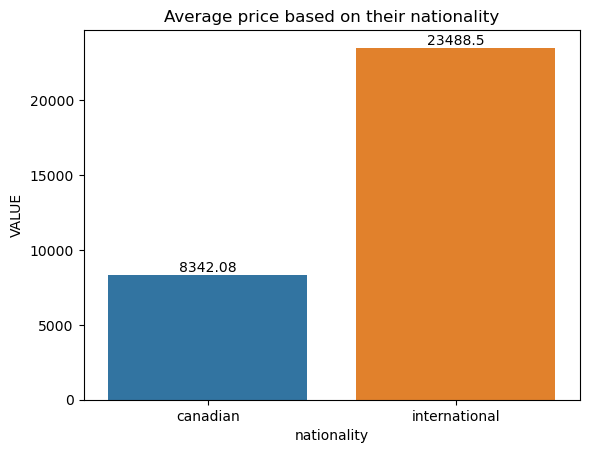

In [92]:
avg_price_nat_plot= sns.barplot(data=avg_price_nat,
                                x=avg_price_nat.nationality,
                                y=avg_price_nat.VALUE, 
                                hue='nationality'
                               )
for num in avg_price_nat_plot.containers:
    avg_price_nat_plot.bar_label(num,)
plt.title('Average price based on their nationality')
plt.show()

We can see that international students tend to pay more than canadian students, with it being more than double

#### What is the average price based on their level of study and nationality in the year of 2024/2025?

In [95]:
avg_price_level_nat=year.groupby(['nationality', 'Level of study'])['VALUE'].mean()
avg_price_level_nat=avg_price_level_nat.reset_index()
avg_price_level_nat

,nationality,Level of study,VALUE
0,canadian,grad,8360.438155
1,canadian,undergrad,8324.393939
2,international,grad,17552.179570
3,international,undergrad,29463.328571


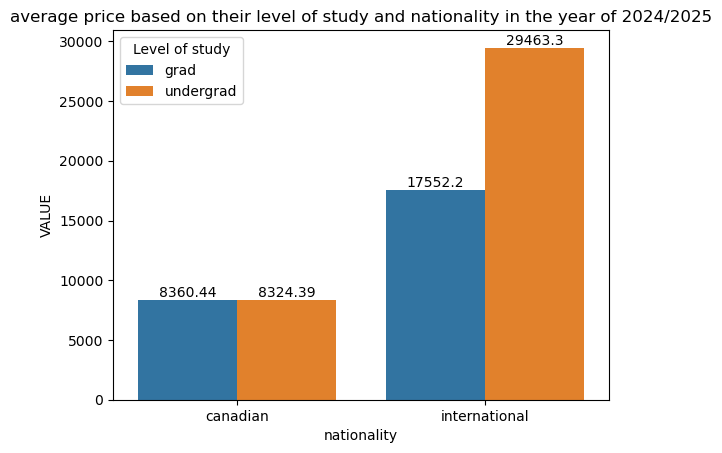

In [96]:
avg_price_nat_level_nat_plot= sns.barplot(data=avg_price_level_nat,
                                x=avg_price_level_nat.nationality,
                                y=avg_price_level_nat.VALUE, 
                                hue='Level of study'
                               )
for num in avg_price_nat_level_nat_plot.containers:
    avg_price_nat_level_nat_plot.bar_label(num,)
plt.title('average price based on their level of study and nationality in the year of 2024/2025')
plt.show()

In this graph, we see that canadian undergrads pay a bit less than canadian grads. However, there is a bigg difference between international undergrads and grads

#### What is the least to most expensive field of study in 2024/2025 for canadians undergrads?

In [99]:
field=year.groupby(['Field of study','Level of study','nationality'])['VALUE'].mean()
field=field.reset_index()
cad_under=field[field['Level of study']=='undergrad']
cad_under=cad_under[cad_under['nationality']=='canadian']
cad_under=cad_under.sort_values(by='VALUE', ascending=True)
cad_under

,Field of study,Level of study,nationality,VALUE
54,"Personal, protective and transportation services",undergrad,canadian,5563.888889
68,"Social and behavioural sciences, and legal stu...",undergrad,canadian,5634.800000
28,Humanities,undergrad,canadian,5672.500000
50,"Other health, parks, recreation and fitness",undergrad,canadian,5750.100000
18,Education,undergrad,canadian,5825.700000
62,Physical and life sciences and technologies,undergrad,canadian,5826.800000
2,"Agriculture, natural resources and conservation",undergrad,canadian,5843.800000
76,"Visual and performing arts, and communications...",undergrad,canadian,5897.700000
42,Nursing,undergrad,canadian,5991.300000
36,"Mathematics, computer and information sciences",undergrad,canadian,5995.700000


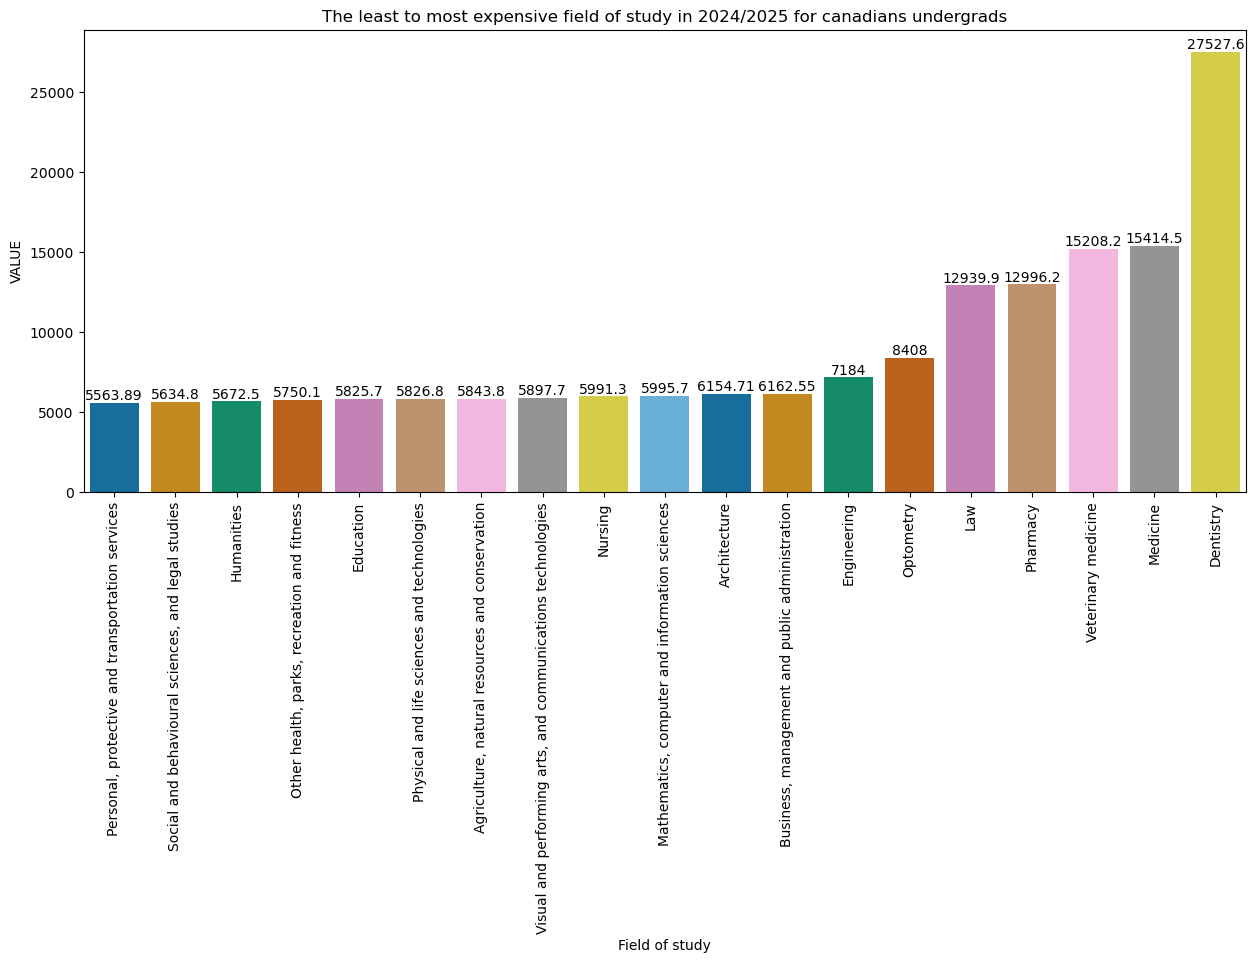

In [100]:
plt.figure(figsize=(15,6))
fields=sns.barplot(cad_under, 
                   x='Field of study', 
                   y='VALUE', 
                   hue='Field of study', 
                   palette='colorblind'
                  )
plt.xticks(rotation=90)
for num in fields.containers:
    fields.bar_label(num,)
plt.title('The least to most expensive field of study in 2024/2025 for canadians undergrads')
plt.show()

We can see that the programs requiring a lot of science are the most expensive ones for the canadian undergrads

#### What is the least to most expensive field of study in 2024/2025 for canadians grads?

In [103]:
cad_grad=field[field['Level of study']=='grad']
cad_grad=cad_grad[cad_grad['nationality']=='canadian']
cad_grad=cad_grad.sort_values(by='VALUE', ascending=True)
cad_grad

,Field of study,Level of study,nationality,VALUE
70,Veterinary medicine,grad,canadian,3583.800000
44,Optometry,grad,canadian,3987.000000
26,Humanities,grad,canadian,4899.777778
74,"Visual and performing arts, and communications...",grad,canadian,5126.750000
56,Pharmacy,grad,canadian,5178.333333
40,Nursing,grad,canadian,5295.400000
16,Education,grad,canadian,5604.000000
60,Physical and life sciences and technologies,grad,canadian,5671.400000
0,"Agriculture, natural resources and conservation",grad,canadian,5692.600000
66,"Social and behavioural sciences, and legal stu...",grad,canadian,5706.800000


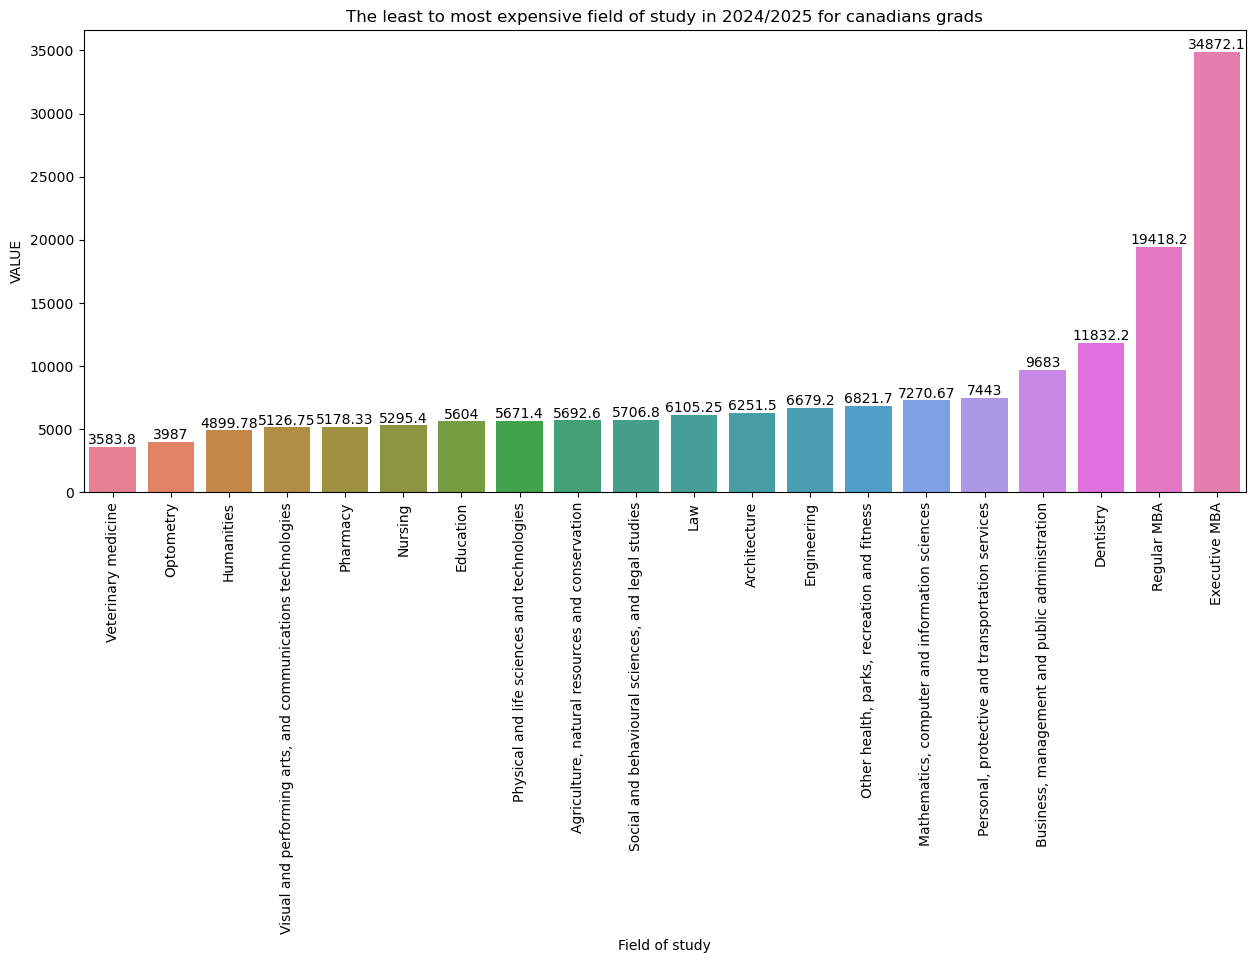

In [104]:
plt.figure(figsize=(15,6))
fields=sns.barplot(cad_grad, 
                   x='Field of study', 
                   y='VALUE', 
                   hue='Field of study', 
                   palette='husl'
                  )
plt.xticks(rotation=90)
for num in fields.containers:
    fields.bar_label(num,)
plt.title('The least to most expensive field of study in 2024/2025 for canadians grads')
plt.show()

Here we see that business programs are actually the most expensive for canadian grad students, with it being more than double

#### What is the least to most expensive field of study in 2024/2025 for international undergrads?

In [107]:
int_under=field[field['Level of study']=='undergrad']
int_under=int_under[int_under['nationality']=='international']
int_under=int_under.sort_values(by='VALUE', ascending=True)
int_under

,Field of study,Level of study,nationality,VALUE
55,"Personal, protective and transportation services",undergrad,international,20026.222222
19,Education,undergrad,international,21198.720000
77,"Visual and performing arts, and communications...",undergrad,international,22066.700000
51,"Other health, parks, recreation and fitness",undergrad,international,22102.900000
43,Nursing,undergrad,international,22348.400000
69,"Social and behavioural sciences, and legal stu...",undergrad,international,23943.000000
11,"Business, management and public administration",undergrad,international,24113.600000
3,"Agriculture, natural resources and conservation",undergrad,international,25033.500000
29,Humanities,undergrad,international,25154.100000
37,"Mathematics, computer and information sciences",undergrad,international,25902.300000


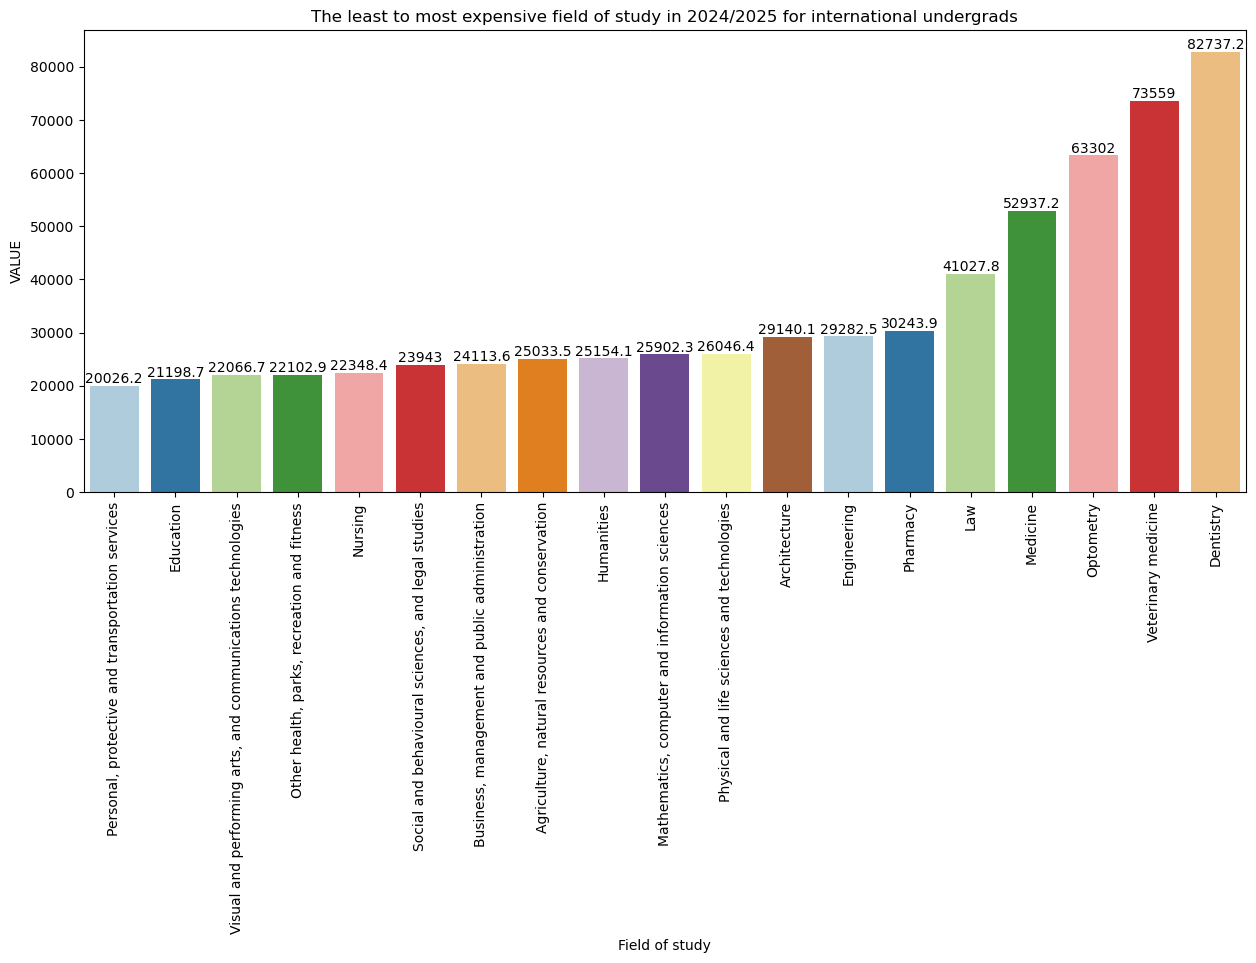

In [108]:
plt.figure(figsize=(15,6))
fields=sns.barplot(int_under, 
                   x='Field of study', 
                   y='VALUE', 
                   hue='Field of study', 
                   palette='Paired'
                  )
plt.xticks(rotation=90)
for num in fields.containers:
    fields.bar_label(num,)
plt.title('The least to most expensive field of study in 2024/2025 for international undergrads')
plt.show()

For international students, we can see that they are over 20k of tuition, dentistry being more than 80k, being the most expensive program out of all of them

#### what is the least to most expensive field of study in 2024/2025 for international grads?

In [111]:
int_grad=field[field['Level of study']=='grad']
int_grad=int_grad[int_grad['nationality']=='international']
int_grad=int_grad.sort_values(by='VALUE', ascending=True)
int_grad

,Field of study,Level of study,nationality,VALUE
71,Veterinary medicine,grad,international,11423.000000
27,Humanities,grad,international,11904.555556
67,"Social and behavioural sciences, and legal stu...",grad,international,12568.300000
17,Education,grad,international,12747.600000
61,Physical and life sciences and technologies,grad,international,12999.300000
75,"Visual and performing arts, and communications...",grad,international,13006.750000
45,Optometry,grad,international,13348.000000
1,"Agriculture, natural resources and conservation",grad,international,13770.800000
57,Pharmacy,grad,international,13890.000000
31,Law,grad,international,14562.375000


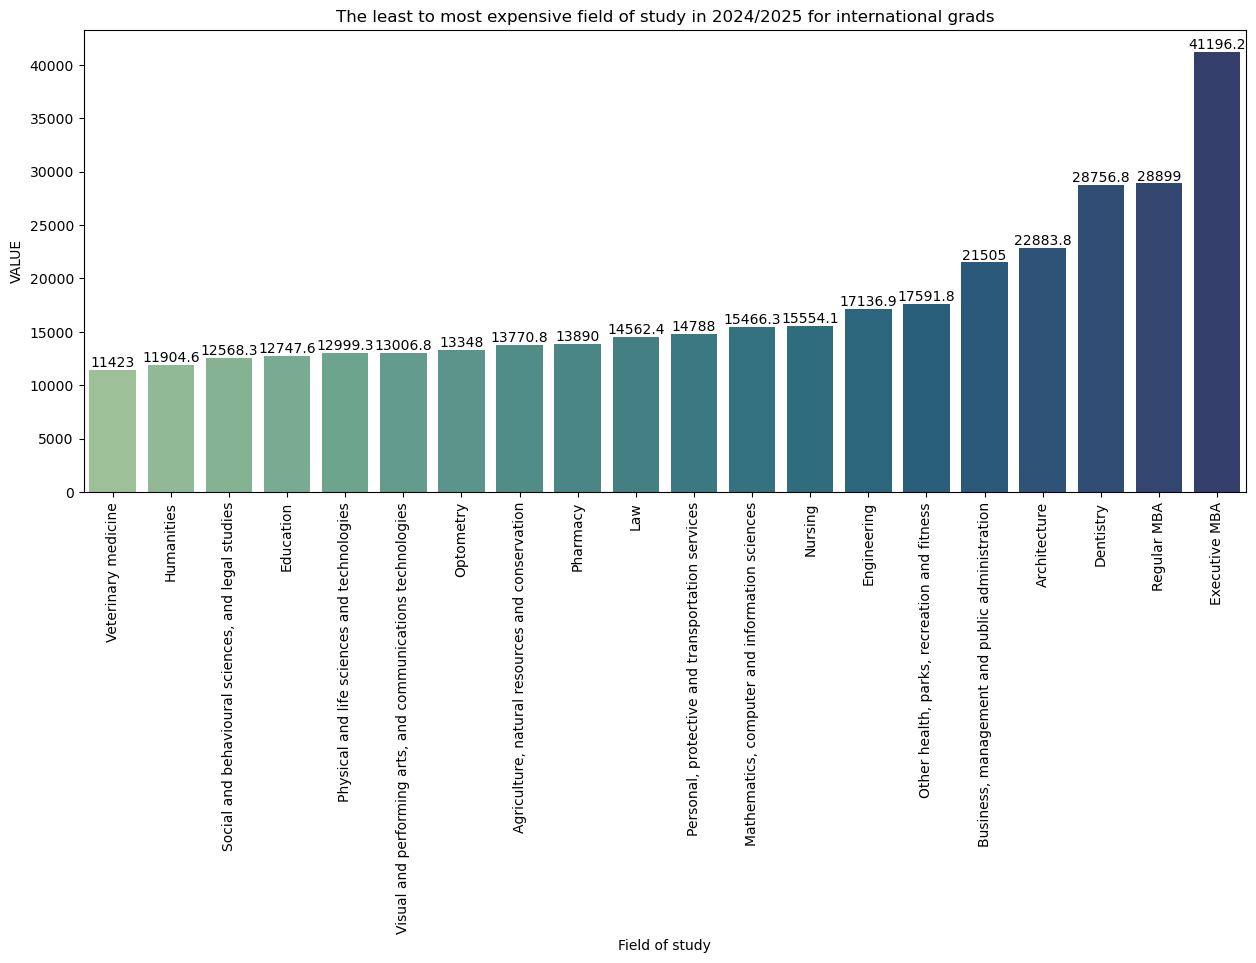

In [112]:
plt.figure(figsize=(15,6))
fields=sns.barplot(int_grad, 
                   x='Field of study', 
                   y='VALUE', 
                   hue='Field of study', 
                   palette='crest'
                  )
plt.xticks(rotation=90)
for num in fields.containers:
    fields.bar_label(num,)
plt.title('The least to most expensive field of study in 2024/2025 for international grads')
plt.show()

Same thing for international grads, their most expensive program is business, but them being over 20k compared to canadians who are just under 20k

#### Where is the most to least expensive province to study for each nationality?

In [115]:
provinces=year.groupby(['GEO', 'nationality'])['VALUE'].mean()
provinces=provinces.reset_index().sort_values(by='VALUE', ascending=False)
provinces

,GEO,nationality,VALUE
13,Ontario,international,38359.948718
3,British Columbia,international,27893.636364
1,Alberta,international,25711.764706
17,Quebec,international,24880.085714
11,Nova Scotia,international,24629.529412
19,Saskatchewan,international,23702.932292
15,Prince Edward Island,international,17336.360000
7,New Brunswick,international,15921.280000
5,Manitoba,international,15727.033333
12,Ontario,canadian,12166.769231


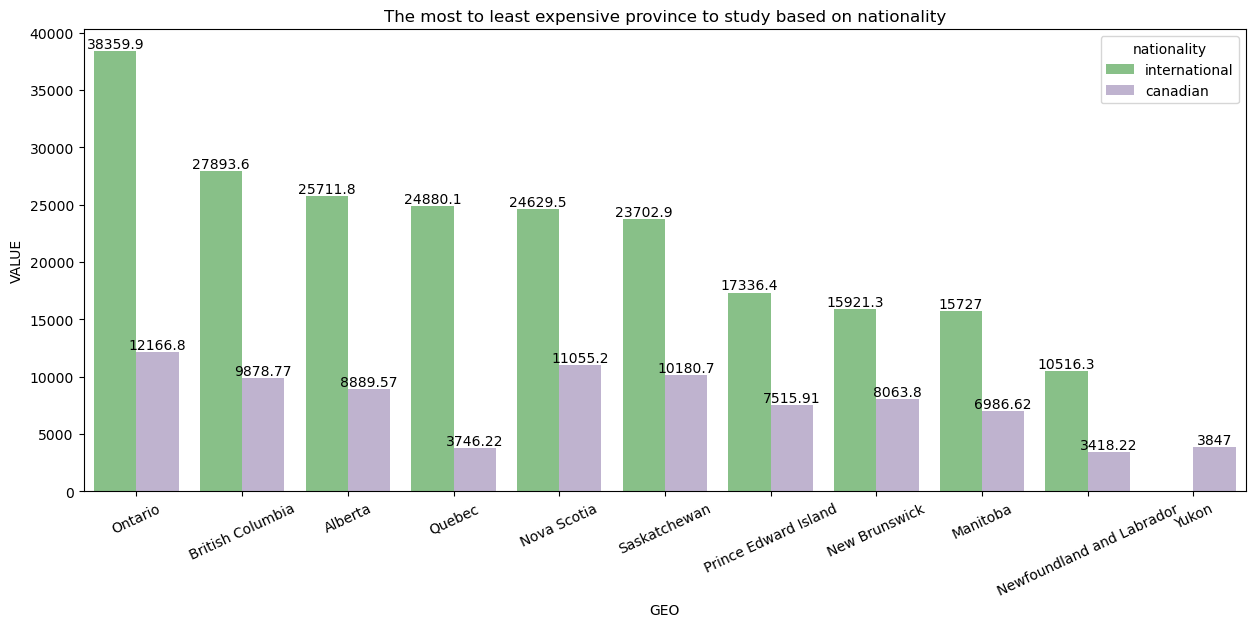

In [214]:
plt.figure(figsize=(15,6))
prov=sns.barplot(provinces,
                 x='GEO',
                 y='VALUE',
                 hue='nationality',
                 palette='Accent'
                )
plt.xticks(rotation=25)
for num in prov.containers:
    prov.bar_label(num,)
plt.title('The most to least expensive province to study based on nationality')
plt.show()

Here we can see that Ontario is the most expensive for both nationality, and yukon having no internation info as we removed it earlier, since we had no data

#### How much has the prices have changed over the years for each nationality and level of study

In [119]:
change=df.groupby(['Field of study','REF_DATE', 'nationality','Level of study',])['VALUE'].mean()
change=change.reset_index()
change

,Field of study,REF_DATE,nationality,Level of study,VALUE
0,"Agriculture, natural resources and conservation",2017/2018,canadian,grad,5273.90
1,"Agriculture, natural resources and conservation",2017/2018,canadian,undergrad,5661.50
2,"Agriculture, natural resources and conservation",2017/2018,international,grad,12778.50
3,"Agriculture, natural resources and conservation",2017/2018,international,undergrad,19628.20
4,"Agriculture, natural resources and conservation",2018/2019,canadian,grad,5308.80
...,...,...,...,...,...
619,"Visual and performing arts, and communications...",2023/2024,international,undergrad,21321.40
620,"Visual and performing arts, and communications...",2024/2025,canadian,grad,5126.75
621,"Visual and performing arts, and communications...",2024/2025,canadian,undergrad,5897.70
622,"Visual and performing arts, and communications...",2024/2025,international,grad,13006.75


In [120]:
#canadian undergrad graph
c_und=change[change['nationality']=='canadian']
c_und=c_und[c_und['Level of study']=='undergrad']
c_und

,Field of study,REF_DATE,nationality,Level of study,VALUE
1,"Agriculture, natural resources and conservation",2017/2018,canadian,undergrad,5661.5
5,"Agriculture, natural resources and conservation",2018/2019,canadian,undergrad,5753.0
9,"Agriculture, natural resources and conservation",2019/2020,canadian,undergrad,5720.8
13,"Agriculture, natural resources and conservation",2020/2021,canadian,undergrad,5798.7
17,"Agriculture, natural resources and conservation",2021/2022,canadian,undergrad,5772.4
...,...,...,...,...,...
605,"Visual and performing arts, and communications...",2020/2021,canadian,undergrad,5981.0
609,"Visual and performing arts, and communications...",2021/2022,canadian,undergrad,5976.1
613,"Visual and performing arts, and communications...",2022/2023,canadian,undergrad,5824.7
617,"Visual and performing arts, and communications...",2023/2024,canadian,undergrad,5823.3


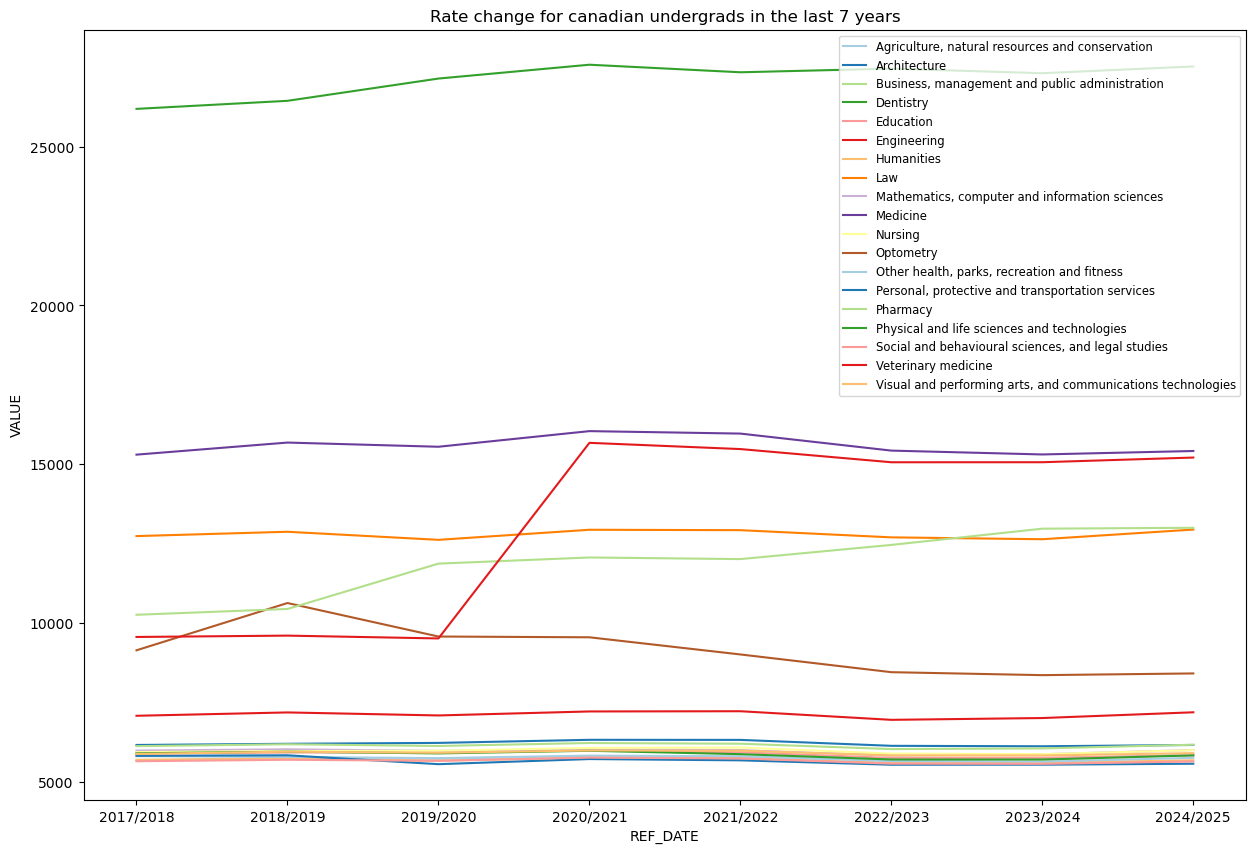

In [121]:
plt.figure(figsize=(15,10))
sns.lineplot(c_und, x='REF_DATE', y='VALUE', hue= 'Field of study', palette='Paired')
plt.legend(loc='upper right', fontsize='small')
plt.title('Rate change for canadian undergrads in the last 7 years')
plt.show()

We can see here that most of the programs have a solid price range. We do see a more visible increase in Dentisty and Veterinary medicine as well as pharmacy. we can also see a slight decrease in optometry.

In [123]:
#canadian grads
c_grad=change[change['nationality']=='canadian']
c_grad=c_grad[c_grad['Level of study']=='grad']
c_grad

,Field of study,REF_DATE,nationality,Level of study,VALUE
0,"Agriculture, natural resources and conservation",2017/2018,canadian,grad,5273.900
4,"Agriculture, natural resources and conservation",2018/2019,canadian,grad,5308.800
8,"Agriculture, natural resources and conservation",2019/2020,canadian,grad,5824.300
12,"Agriculture, natural resources and conservation",2020/2021,canadian,grad,5890.300
16,"Agriculture, natural resources and conservation",2021/2022,canadian,grad,5780.500
...,...,...,...,...,...
604,"Visual and performing arts, and communications...",2020/2021,canadian,grad,5396.875
608,"Visual and performing arts, and communications...",2021/2022,canadian,grad,5390.500
612,"Visual and performing arts, and communications...",2022/2023,canadian,grad,5137.250
616,"Visual and performing arts, and communications...",2023/2024,canadian,grad,5100.125


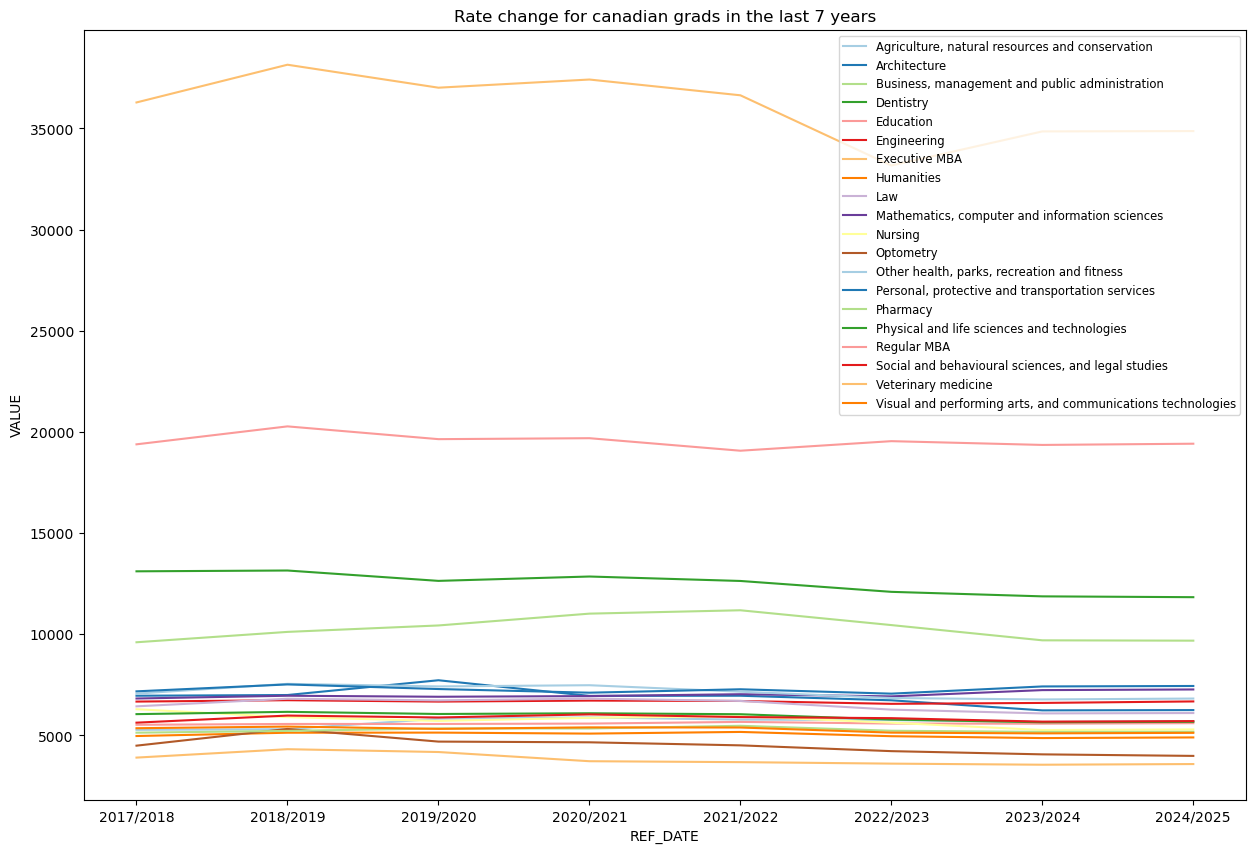

In [124]:
plt.figure(figsize=(15,10))
sns.lineplot(c_grad, x='REF_DATE', y='VALUE', hue= 'Field of study', palette='Paired')
plt.legend(loc='upper right', fontsize='small')
plt.title('Rate change for canadian grads in the last 7 years')
plt.show()

Here, we can see that most of the programs also decided to remain stable throughout the years. However, we so see that the executive MBA program has been unstable, deciding to increase in 2018 and decrease till 2022, and reincrease

In [126]:
#international undergrads
i_und=change[change['nationality']=='international']
i_und=i_und[i_und['Level of study']=='undergrad']
i_und

,Field of study,REF_DATE,nationality,Level of study,VALUE
3,"Agriculture, natural resources and conservation",2017/2018,international,undergrad,19628.2
7,"Agriculture, natural resources and conservation",2018/2019,international,undergrad,20228.1
11,"Agriculture, natural resources and conservation",2019/2020,international,undergrad,20820.2
15,"Agriculture, natural resources and conservation",2020/2021,international,undergrad,21969.7
19,"Agriculture, natural resources and conservation",2021/2022,international,undergrad,22450.7
...,...,...,...,...,...
607,"Visual and performing arts, and communications...",2020/2021,international,undergrad,20809.3
611,"Visual and performing arts, and communications...",2021/2022,international,undergrad,21069.5
615,"Visual and performing arts, and communications...",2022/2023,international,undergrad,21017.3
619,"Visual and performing arts, and communications...",2023/2024,international,undergrad,21321.4


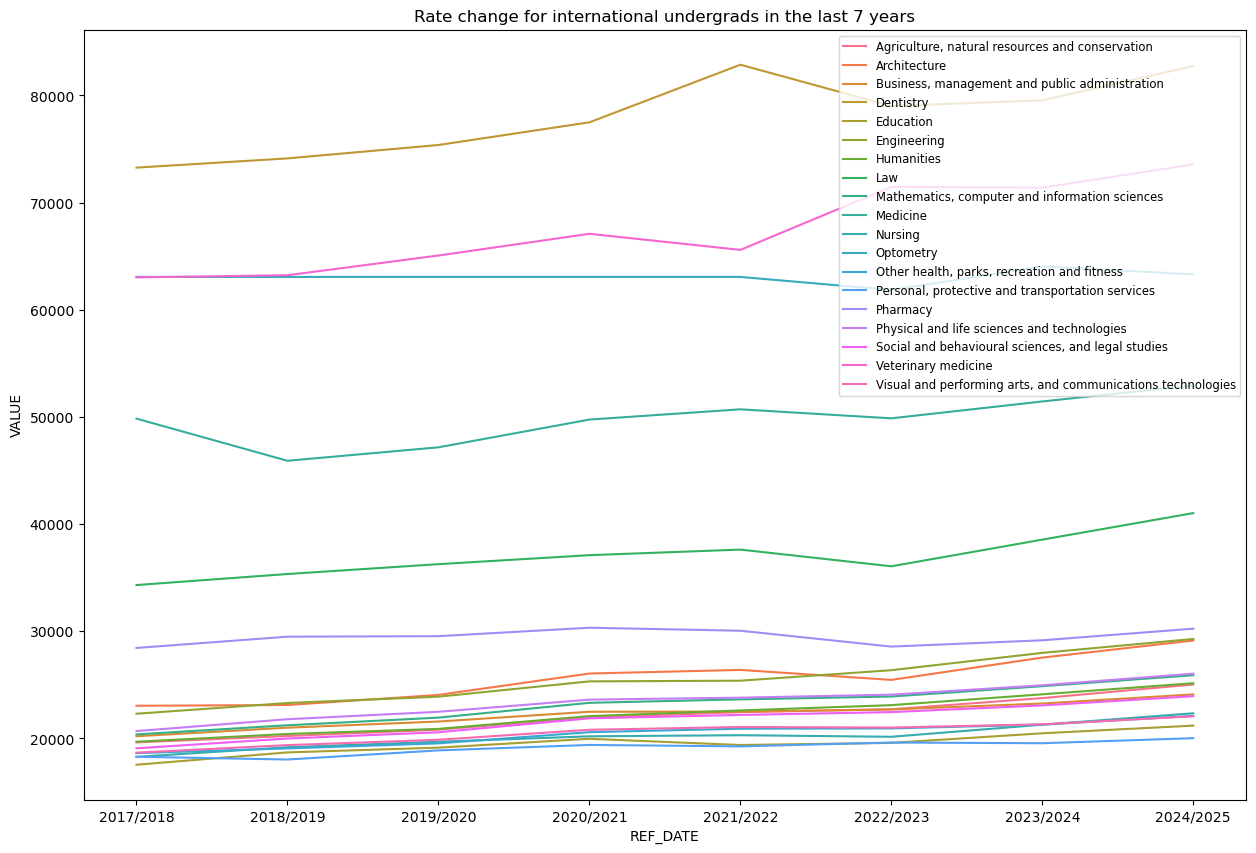

In [127]:
plt.figure(figsize=(15,10))
sns.lineplot(i_und, x='REF_DATE', y='VALUE', hue= 'Field of study')
plt.legend(loc='upper right', fontsize='small')
plt.title('Rate change for international undergrads in the last 7 years')
plt.show()

For international undergraduates students, we see that every year, we see a pretty significant increase in all of the programs, with veterinary medicine and dentistry have have a higher slope in 2022

In [129]:
#international grads
i_grad=change[change['nationality']=='international']
i_grad=i_grad[i_grad['Level of study']=='grad']
i_grad

,Field of study,REF_DATE,nationality,Level of study,VALUE
2,"Agriculture, natural resources and conservation",2017/2018,international,grad,12778.50
6,"Agriculture, natural resources and conservation",2018/2019,international,grad,12884.00
10,"Agriculture, natural resources and conservation",2019/2020,international,grad,13166.70
14,"Agriculture, natural resources and conservation",2020/2021,international,grad,13781.40
18,"Agriculture, natural resources and conservation",2021/2022,international,grad,13967.40
...,...,...,...,...,...
606,"Visual and performing arts, and communications...",2020/2021,international,grad,12713.25
610,"Visual and performing arts, and communications...",2021/2022,international,grad,12774.25
614,"Visual and performing arts, and communications...",2022/2023,international,grad,12311.75
618,"Visual and performing arts, and communications...",2023/2024,international,grad,12681.25


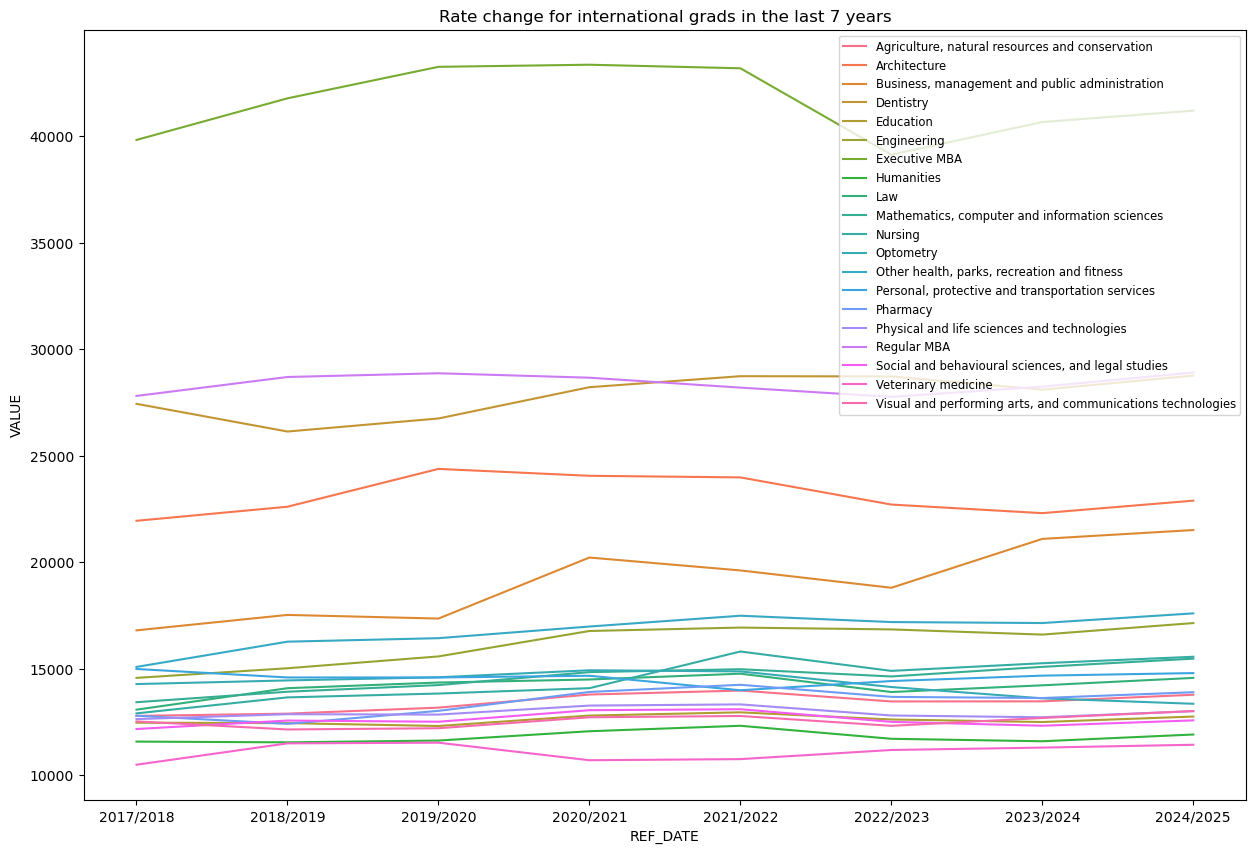

In [130]:
plt.figure(figsize=(15,10))
sns.lineplot(i_grad, x='REF_DATE', y='VALUE', hue= 'Field of study')
plt.legend(loc='upper right', fontsize='small')
plt.title('Rate change for international grads in the last 7 years')
plt.show()

Here, we see that there was a small by visible increase in most programs, with some being more visible than others.

## Feature Engineering and Data Preprocessing

For modeling, all the columns need to be intergers

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5064 entries, 0 to 1679
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   REF_DATE        5064 non-null   object 
 1   GEO             5064 non-null   object 
 2   DGUID           5064 non-null   int32  
 3   Field of study  5064 non-null   object 
 4   COORDINATE      5064 non-null   float64
 5   VALUE           5064 non-null   float64
 6   Level of study  5064 non-null   object 
 7   nationality     5064 non-null   object 
dtypes: float64(2), int32(1), object(5)
memory usage: 336.3+ KB


In [135]:
#first, drop DGUID instead of GEO, because the model might think the DGUID will have an order, which it doesn't.
df=df.drop('DGUID', axis=1)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5064 entries, 0 to 1679
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   REF_DATE        5064 non-null   object 
 1   GEO             5064 non-null   object 
 2   Field of study  5064 non-null   object 
 3   COORDINATE      5064 non-null   float64
 4   VALUE           5064 non-null   float64
 5   Level of study  5064 non-null   object 
 6   nationality     5064 non-null   object 
dtypes: float64(2), object(5)
memory usage: 316.5+ KB


In [137]:
#next will be label encoding the REF_DATE, level of study and nationality columns first, because they are values that are ordered

# Create instance of LabelEncoder
ord_enc = OrdinalEncoder()
ord_encodes=ord_enc.fit_transform(df[['REF_DATE','Level of study','nationality']])
ord_df = pd.DataFrame(ord_encodes, columns = ord_enc.get_feature_names_out(['REF_DATE','Level of study','nationality']))

ord_df.head()

,REF_DATE,Level of study,nationality
0,0.0,1.0,0.0
1,1.0,1.0,0.0
2,2.0,1.0,0.0
3,3.0,1.0,0.0
4,4.0,1.0,0.0


In [138]:
#OneHotEncoder for GEO and Field of Study

ohe = OneHotEncoder(drop='first', sparse_output = False)

encodes=ohe.fit_transform(df[['GEO','Field of study']])

ohe_df = pd.DataFrame(encodes, columns = ohe.get_feature_names_out(['GEO','Field of study']))

ohe_df.head()

,GEO_British Columbia,GEO_Manitoba,GEO_New Brunswick,GEO_Newfoundland and Labrador,GEO_Nova Scotia,GEO_Ontario,GEO_Prince Edward Island,GEO_Quebec,GEO_Saskatchewan,GEO_Yukon,...,Field of study_Nursing,Field of study_Optometry,"Field of study_Other health, parks, recreation and fitness","Field of study_Personal, protective and transportation services",Field of study_Pharmacy,Field of study_Physical and life sciences and technologies,Field of study_Regular MBA,"Field of study_Social and behavioural sciences, and legal studies",Field of study_Veterinary medicine,"Field of study_Visual and performing arts, and communications technologies"
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [139]:
#we now have to reset the indexes for all dfs in order for all the values to realign
ord_df = ord_df.reset_index(drop=True)
ohe_df = ohe_df.reset_index(drop=True)
df = df.reset_index(drop=True)

In [140]:
#joining the new df
new_df = df.drop(columns=['REF_DATE','Level of study','nationality','GEO','Field of study']).join([ord_df,ohe_df])

new_df.head()

,COORDINATE,VALUE,REF_DATE,Level of study,nationality,GEO_British Columbia,GEO_Manitoba,GEO_New Brunswick,GEO_Newfoundland and Labrador,GEO_Nova Scotia,...,Field of study_Nursing,Field of study_Optometry,"Field of study_Other health, parks, recreation and fitness","Field of study_Personal, protective and transportation services",Field of study_Pharmacy,Field of study_Physical and life sciences and technologies,Field of study_Regular MBA,"Field of study_Social and behavioural sciences, and legal studies",Field of study_Veterinary medicine,"Field of study_Visual and performing arts, and communications technologies"
0,2.2,3046.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.2,2837.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.2,2768.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.2,2781.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.2,2708.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5064 entries, 0 to 5063
Data columns (total 35 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   COORDINATE                                                                  5064 non-null   float64
 1   VALUE                                                                       5064 non-null   float64
 2   REF_DATE                                                                    5064 non-null   float64
 3   Level of study                                                              5064 non-null   float64
 4   nationality                                                                 5064 non-null   float64
 5   GEO_British Columbia                                                        5064 non-null   float64
 6   GEO_Manitoba                                    

In [142]:
#now all the columns are numbers, we need to scale our data, we will just use standard scaler.

#train-test split.

# Separate features and target variable
X = new_df.drop('VALUE', axis=1)
y = new_df['VALUE']

# Split data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 1)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit-transform training data
scaled_X_train = scaler.fit_transform(X_train)

# Transform only on test and val data
scaled_X_test = scaler.transform(X_test)

## Data modeling

In this section, i will be basically finding a regression model with the best rmse score.

### Model #1: Linear Regression

In [146]:
# Create instance of model

mlr_model = LinearRegression()

# Train model

mlr_model.fit(scaled_X_train, y_train)

LinearRegression()

In [147]:
# Obtain y hat values

mlr_pred = mlr_model.predict(scaled_X_test)


# Obtain metrics

MAE = mean_absolute_error(y_test, mlr_pred)
MSE = mean_squared_error(y_test, mlr_pred)
RMSE = np.sqrt(MSE)

MAE, MSE, RMSE

(5329.109330114879, 70392476.50483072, 8390.022437683388)

A difference in price of 8390$ for tuition is crazy

### Model #2: ELasticNetCV

In [150]:
# Create instance of model
elasticcv_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1], eps=0.01, n_alphas=300, max_iter=10000)

# Fit the model on scaled_X_train
elasticcv_model.fit(scaled_X_train, y_train)

ElasticNetCV(eps=0.01, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
             max_iter=10000, n_alphas=300)

In [151]:
elasticcv_pred = elasticcv_model.predict(scaled_X_test)

# Obtain metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

MAE = mean_absolute_error(y_test, elasticcv_pred)
MSE = mean_squared_error(y_test, elasticcv_pred)
RMSE = np.sqrt(MSE)

MAE, MSE, RMSE

(5275.148492819763, 70615430.07303832, 8403.298761381648)

Since these 2 linear models did not perform well, we will test Random Forest Regressor

### Model #3: RandomForestRegressor

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5064 entries, 0 to 5063
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   REF_DATE        5064 non-null   object 
 1   GEO             5064 non-null   object 
 2   Field of study  5064 non-null   object 
 3   COORDINATE      5064 non-null   float64
 4   VALUE           5064 non-null   float64
 5   Level of study  5064 non-null   object 
 6   nationality     5064 non-null   object 
dtypes: float64(2), object(5)
memory usage: 277.1+ KB


In [155]:
#since this is a random forest, we will encode these with ordinal encoder to minimize the noise, 
#since it will not create many columns like one-hot-encoding, and random forest does not assume a order.

In [156]:
rfr_enc=OrdinalEncoder()

encs=rfr_enc.fit_transform(df[['REF_DATE', 'GEO','Field of study','Level of study','nationality']])

rfr_enc_df=pd.DataFrame(encs, columns=rfr_enc.get_feature_names_out(['REF_DATE', 'GEO','Field of study','Level of study','nationality']))

rfr_enc_df=rfr_enc_df.reset_index(drop=True)

In [157]:
rfr_enc_df

,REF_DATE,GEO,Field of study,Level of study,nationality
0,0.0,4.0,4.0,1.0,0.0
1,1.0,4.0,4.0,1.0,0.0
2,2.0,4.0,4.0,1.0,0.0
3,3.0,4.0,4.0,1.0,0.0
4,4.0,4.0,4.0,1.0,0.0
...,...,...,...,...,...
5059,3.0,1.0,14.0,0.0,1.0
5060,4.0,1.0,14.0,0.0,1.0
5061,5.0,1.0,14.0,0.0,1.0
5062,6.0,1.0,14.0,0.0,1.0


In [158]:
rfr_df=df.drop(columns=['REF_DATE', 'GEO','Field of study','Level of study','nationality']).join(rfr_enc_df)
rfr_df

,COORDINATE,VALUE,REF_DATE,GEO,Field of study,Level of study,nationality
0,2.20,3046.00,0.0,4.0,4.0,1.0,0.0
1,2.20,2837.00,1.0,4.0,4.0,1.0,0.0
2,2.20,2768.00,2.0,4.0,4.0,1.0,0.0
3,2.20,2781.00,3.0,4.0,4.0,1.0,0.0
4,2.20,2708.00,4.0,4.0,4.0,1.0,0.0
...,...,...,...,...,...,...,...
5059,11.22,16355.25,3.0,1.0,14.0,0.0,1.0
5060,11.22,16355.25,4.0,1.0,14.0,0.0,1.0
5061,11.22,16142.00,5.0,1.0,14.0,0.0,1.0
5062,11.22,16157.00,6.0,1.0,14.0,0.0,1.0


In [159]:
#Scale Data
rfr_scale=StandardScaler()

X = rfr_df.drop('VALUE', axis=1)
y = rfr_df['VALUE']

# Split data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 1)

# Fit-transform training data
scaled_X_train = rfr_scale.fit_transform(X_train)

# Transform only on test and val data
scaled_X_test = rfr_scale.transform(X_test)

In [160]:
#grid_search_cv: rfr

rfr=RandomForestRegressor(random_state=3)

params={'n_estimators':[200,1000],
        'max_features':['sqrt', 'log2', 1.0],
        'oob_score':[True],
       }

grid_model = GridSearchCV(estimator=rfr,
                          param_grid=params,
                          scoring='neg_mean_squared_error',
                          cv=6,
                          verbose=1)

In [161]:
grid_model.fit(scaled_X_train, y_train)

Fitting 6 folds for each of 6 candidates, totalling 36 fits


GridSearchCV(cv=6, estimator=RandomForestRegressor(random_state=3),
             param_grid={'max_features': ['sqrt', 'log2', 1.0],
                         'n_estimators': [200, 1000], 'oob_score': [True]},
             scoring='neg_mean_squared_error', verbose=1)

In [162]:
grid_model.best_params_

{'max_features': 1.0, 'n_estimators': 1000, 'oob_score': True}

In [163]:
grid_pred = grid_model.predict(scaled_X_test)

# Obtain metrics

MAE = mean_absolute_error(y_test, grid_pred)
MSE = mean_squared_error(y_test, grid_pred)
RMSE = np.sqrt(MSE)

MAE, MSE, RMSE

(597.6709027537581, 1654541.7539996335, 1286.2899183308689)

In [164]:
y_test[:5]

1016     7031.0
4448    25210.0
1132    15422.0
3160    18580.0
3641    23000.0
Name: VALUE, dtype: float64

In [165]:
grid_pred[:5]

array([ 7052.084, 25824.239, 14883.258, 19595.432, 23696.844])

In [166]:
#Manual rain forest

rfr2=RandomForestRegressor(n_estimators=1000, max_features=5, random_state=3,oob_score=True)

rfr2.fit(scaled_X_train, y_train)

RandomForestRegressor(max_features=5, n_estimators=1000, oob_score=True,
                      random_state=3)

In [167]:
rfr2_pred = rfr2.predict(scaled_X_test)

# Obtain metrics

MAE = mean_absolute_error(y_test, rfr2_pred)
MSE = mean_squared_error(y_test, rfr2_pred)
RMSE = np.sqrt(MSE)

MAE, MSE, RMSE

(593.1648602161641, 1657919.0508657293, 1287.6020545439221)

In [168]:
y_test

1016     7031.0
4448    25210.0
1132    15422.0
3160    18580.0
3641    23000.0
         ...   
1070    14274.0
4095    22065.0
191      6341.0
3451    21147.0
3960    12037.0
Name: VALUE, Length: 760, dtype: float64

In [169]:
rfr2_pred[:5]

array([ 7055.689     , 25783.449     , 14874.24      , 19605.813     ,
       23804.10885714])

We will be choosing the grid model as it did slightly better than the manual one. Also, the rmse is not bad but that good also. As having a difference in education prices is a lot, but we do have values that go up to 80k, so I think its Okay to be off by 1.3k.

### Coordinate model

In [172]:
#coordinate is essential for the model to perform well. 
#But since it a coordinate has multiple data, we need to create a model that when we put similar data, it will apply on its own
X=rfr_df[['GEO','Field of study','Level of study','nationality']]
y=rfr_df['COORDINATE'].astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 1)

In [216]:
# It will first be tested on a grid search log_model
# Model parameters
coor_log_model = LogisticRegression(C=1,random_state=1, max_iter=1000, solver='saga')

coor_log_model.fit(X_train,y_train)

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=1, max_iter=1000, random_state=1, solver='saga')

In [218]:
coor_log_predict=coor_log_model.predict(X_test)
print(accuracy_score(y_test,coor_log_predict))

0.13157894736842105


We can see that it did not do to well, so we will be doing a different model

In [176]:
#random forest Classifier

rfc=RandomForestClassifier()

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [177]:
rfc_pred= rfc.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,rfc_pred))

1.0


Here we see that the accuracy f1 accuracy is 100%

## New input

In [180]:
new_data={'REF_DATE':['2024/2025'],
        'GEO':['New Brunswick'],
        'Field of study':['Education'],
        'Level of study':['undergrad'],
        'nationality':['canadian']}
        
#Create dataframe
to_enc_data=pd.DataFrame.from_dict(new_data)        

In [184]:
#encode the new data
encode=rfr_enc.transform(to_enc_data)
encoded_input=pd.DataFrame(encode,columns=rfr_enc.get_feature_names_out())     

In [186]:
#use the coodinate model, while making sure to fit the necessary columns
coor_features=encoded_input[['GEO','Field of study','Level of study','nationality']]
encoded_input['COORDINATE']=rfc.predict(coor_features)

#putting the coordinate column in from since thats the order of dataframe for the scaling and model prediction
col=encoded_input.pop('COORDINATE')
encoded_input.insert(0, 'COORDINATE', col)

        

In [190]:
#scale and predict
scaled_input=rfr_scale.transform(encoded_input)

grid_model.predict(scaled_input)

array([7665.83233333])

### Saving the model.

In [192]:
import pickle

In [194]:
data = {"main_model": grid_model, "coor_model":rfc, "rfr_encoder": rfr_enc, 'rfr_scaler':rfr_scale}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [195]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

In [197]:
main_model = data["main_model"]
coor_model=data["coor_model"]
model_encoder = data["rfr_encoder"]
scaler=data['rfr_scaler']

In [202]:
#predict the same as earlier
y_pred = main_model.predict(scaled_input)
y_pred

array([7665.83233333])